# Byte Pair Encoding (BPE) Tokenizer - Monolithic Implementation
# Inspired by Andrej Karpathy's minGPT/minBPE approach

This notebook contains a complete, monolithic implementation of the Byte Pair Encoding (BPE) algorithm for tokenization. 
The code is designed to be clear, educational, and focused on learning progression.

## Algorithm Overview

Byte Pair Encoding (BPE) is a data compression and tokenization technique that:
1. Starts with a vocabulary of single bytes (0-255)
2. Iteratively finds the most frequent adjacent token pairs
3. Merges these pairs to create new tokens
4. Continues until a desired vocabulary size is reached
5. Uses this vocabulary to encode and decode text

Let's implement the full algorithm from scratch, focusing on clarity and educational value.

In [1]:
import time
import json
import logging
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Set, Counter as CounterType, Optional, Union, ByteString
from collections import Counter
import re

# Configure logging for educational purposes
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Set the debug flag for verbose output
DEBUG = True

# For consistent visualization
plt.style.use('ggplot')
np.random.seed(42)

In [2]:
class BPETokenizer:
    """
    A monolithic implementation of the Byte Pair Encoding (BPE) tokenizer.
    
    This single class handles the entire tokenization process:
    1. Byte-level tokenization
    2. Pair frequency counting
    3. Merge operations
    4. Vocabulary management
    5. Encoding (text → token IDs)
    6. Decoding (token IDs → text)
    
    For educational purposes, the implementation prioritizes clarity over efficiency.
    """
    
    def __init__(self, vocab_size=256, debug=False):
        """
        Initialize the BPE tokenizer.
        
        Args:
            vocab_size: Target vocabulary size (minimum 256 for bytes)
            debug: Whether to print debug information
        """
        self.debug = debug
        self.vocab_size = max(256, vocab_size)  # We need at least 256 tokens for bytes
        
        # Start with the basic byte vocabulary (0-255)
        # Maps token IDs to their byte sequences
        self.id_to_token = {i: bytes([i]) for i in range(256)}
        
        # Maps byte sequences to their token IDs
        self.token_to_id = {bytes([i]): i for i in range(256)}
        
        # Stores merges as (token1, token2) -> new_token
        self.merges = {}
        
        # Tracks the next available token ID
        self.next_token_id = 256
        
        # Mapping of token pairs to their merge IDs
        self.pair_to_merge_id = {}
        
        if self.debug:
            logger.info(f"Initialized BPETokenizer with target vocab size {self.vocab_size}")
    
    # --- Byte-Level Tokenization ---
    
    def text_to_bytes(self, text):
        """Convert text to a list of byte values."""
        if not isinstance(text, str):
            raise TypeError("Input must be a string")
            
        # Convert to bytes using UTF-8 encoding
        byte_array = list(text.encode('utf-8'))
        
        if self.debug:
            logger.info(f"Converted text to bytes: '{text}' -> {byte_array}")
        
        return byte_array
    
    def bytes_to_text(self, byte_list):
        """Convert a list of byte values back to text."""
        if not isinstance(byte_list, list):
            raise TypeError("Input must be a list of integers")
        
        if not all(isinstance(b, int) and 0 <= b <= 255 for b in byte_list):
            raise ValueError("All bytes must be integers in range 0-255")
            
        # Convert byte list to bytearray and then to string
        try:
            # Convert to bytearray first
            byte_array = bytearray(byte_list)
            
            # Then decode to string using UTF-8
            text = byte_array.decode('utf-8')
            
            if self.debug:
                logger.info(f"Converted bytes to text: {byte_list} -> '{text}'")
                
            return text
        except UnicodeDecodeError as e:
            # Handle invalid UTF-8 sequences
            logger.error(f"Failed to decode bytes: {e}")
            raise ValueError(f"Invalid UTF-8 byte sequence: {e}")
    
    # The rest of the implementation will be added in subsequent cells
    # including pair frequency counting, merge operations, vocabulary management,
    # encoding and decoding functions.

In [3]:
# --- Pair Frequency Counter ---

def count_token_pairs(self, tokens):
    """
    Count occurrences of adjacent token pairs in a sequence.
    
    Args:
        tokens: List of token byte sequences
        
    Returns:
        Counter of token pairs with their frequencies
    """
    if not tokens:
        return Counter()
        
    # Count pairs of adjacent tokens
    pairs = Counter()
    for i in range(len(tokens) - 1):
        pair = (tokens[i], tokens[i + 1])
        pairs[pair] += 1
        
    if self.debug:
        logger.info(f"Found {len(pairs)} unique token pairs")
        if len(pairs) < 10:  # Only log details for small inputs
            logger.info(f"Pair counts: {pairs}")
            
    return pairs

def get_most_frequent_pair(self, pairs):
    """
    Find the most frequent token pair.
    
    Args:
        pairs: Counter of token pairs with their frequencies
        
    Returns:
        Tuple of (token1, token2) representing the most frequent pair
    """
    if not pairs:
        return None
        
    # Find the pair with the highest count
    most_common_pair = pairs.most_common(1)[0][0]
    
    if self.debug:
        count = pairs[most_common_pair]
        t1, t2 = most_common_pair
        logger.info(f"Most frequent pair: ({t1}, {t2}) with count {count}")
        
    return most_common_pair

# Add these methods to the BPETokenizer class to complete this section
BPETokenizer.count_token_pairs = count_token_pairs
BPETokenizer.get_most_frequent_pair = get_most_frequent_pair

In [4]:
# Test the pair frequency counter

# Create a test tokenizer instance
tokenizer = BPETokenizer(debug=True)

# Test with a simple string
test_text = "hello world"
byte_tokens = [bytes([b]) for b in tokenizer.text_to_bytes(test_text)]

print(f"Input text: '{test_text}'")
print(f"Byte tokens: {byte_tokens}")

# Count pairs
pairs = tokenizer.count_token_pairs(byte_tokens)
print(f"\nToken pair counts:")
for pair, count in pairs.most_common():
    t1, t2 = pair
    print(f"  ({list(t1)}, {list(t2)}): {count}")

# Find most frequent pair
most_common = tokenizer.get_most_frequent_pair(pairs)
t1, t2 = most_common
print(f"\nMost frequent pair: ({list(t1)}, {list(t2)})")

# Test with empty input
empty_pairs = tokenizer.count_token_pairs([])
print(f"\nEmpty input pair count: {len(empty_pairs)}")

# Test with single token
single_pairs = tokenizer.count_token_pairs([b'a'])
print(f"Single token pair count: {len(single_pairs)}")

# Test with repeated tokens
repeated_text = "aaaa"
repeated_tokens = [bytes([b]) for b in tokenizer.text_to_bytes(repeated_text)]
repeated_pairs = tokenizer.count_token_pairs(repeated_tokens)
print(f"\nRepeated tokens '{repeated_text}':")
for pair, count in repeated_pairs.most_common():
    t1, t2 = pair
    print(f"  ({list(t1)}, {list(t2)}): {count}")

# Test with Unicode text
unicode_text = "नमस्ते"  # Hindi for "hello"
unicode_tokens = [bytes([b]) for b in tokenizer.text_to_bytes(unicode_text)]
unicode_pairs = tokenizer.count_token_pairs(unicode_tokens)
print(f"\nUnicode tokens '{unicode_text}':")
print(f"Total pairs: {len(unicode_pairs)}")
print(f"Most common pair count: {unicode_pairs.most_common(1)[0][1] if unicode_pairs else 'N/A'}")

2025-05-06 02:27:59,207 - INFO - Initialized BPETokenizer with target vocab size 256
2025-05-06 02:27:59,209 - INFO - Converted text to bytes: 'hello world' -> [104, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100]
2025-05-06 02:27:59,210 - INFO - Found 10 unique token pairs
2025-05-06 02:27:59,211 - INFO - Most frequent pair: (b'h', b'e') with count 1
2025-05-06 02:27:59,212 - INFO - Found 0 unique token pairs
2025-05-06 02:27:59,212 - INFO - Pair counts: Counter()
2025-05-06 02:27:59,213 - INFO - Converted text to bytes: 'aaaa' -> [97, 97, 97, 97]
2025-05-06 02:27:59,214 - INFO - Found 1 unique token pairs
2025-05-06 02:27:59,214 - INFO - Pair counts: Counter({(b'a', b'a'): 3})
2025-05-06 02:27:59,215 - INFO - Converted text to bytes: 'नमस्ते' -> [224, 164, 168, 224, 164, 174, 224, 164, 184, 224, 165, 141, 224, 164, 164, 224, 165, 135]
2025-05-06 02:27:59,215 - INFO - Found 13 unique token pairs


Input text: 'hello world'
Byte tokens: [b'h', b'e', b'l', b'l', b'o', b' ', b'w', b'o', b'r', b'l', b'd']

Token pair counts:
  ([104], [101]): 1
  ([101], [108]): 1
  ([108], [108]): 1
  ([108], [111]): 1
  ([111], [32]): 1
  ([32], [119]): 1
  ([119], [111]): 1
  ([111], [114]): 1
  ([114], [108]): 1
  ([108], [100]): 1

Most frequent pair: ([104], [101])

Empty input pair count: 0
Single token pair count: 0

Repeated tokens 'aaaa':
  ([97], [97]): 3

Unicode tokens 'नमस्ते':
Total pairs: 13
Most common pair count: 4


In [5]:
# --- Merge Operations ---

def merge_pair(self, tokens, pair):
    """
    Replace all occurrences of a token pair with a new merged token.
    
    Args:
        tokens: List of token byte sequences
        pair: Tuple of (token1, token2) to merge
        
    Returns:
        Updated list of tokens after merging
    """
    if not tokens or pair is None:
        return tokens
        
    t1, t2 = pair
    result = []
    i = 0
    
    # Create a new merged token by concatenating the pair
    merged_token = t1 + t2
    
    # Update vocabulary with the new token
    if merged_token not in self.token_to_id:
        self.id_to_token[self.next_token_id] = merged_token
        self.token_to_id[merged_token] = self.next_token_id
        self.next_token_id += 1
        
        # Record this merge in our merges dictionary
        self.merges[pair] = merged_token
        self.pair_to_merge_id[pair] = self.next_token_id - 1
        
        if self.debug:
            logger.info(f"Created new token {list(merged_token)} with ID {self.next_token_id - 1}")
    
    # Scan through tokens and perform merges
    while i < len(tokens):
        # If we're at the last token, just add it
        if i == len(tokens) - 1:
            result.append(tokens[i])
            break
            
        # Check if current pair matches the target pair
        if tokens[i] == t1 and tokens[i + 1] == t2:
            # Add the merged token and skip both original tokens
            result.append(merged_token)
            i += 2
        else:
            # Add the current token and move to the next
            result.append(tokens[i])
            i += 1
            
    if self.debug:
        logger.info(f"Merged {pair} -> {list(merged_token)}")
        logger.info(f"Tokens before: {len(tokens)}, after: {len(result)}")
        
    return result

def train_step(self, tokens):
    """
    Perform a single training step: find most frequent pair and merge it.
    
    Args:
        tokens: List of token byte sequences
        
    Returns:
        (updated tokens, was_merge_performed)
    """
    # Count pairs
    pairs = self.count_token_pairs(tokens)
    
    # If no pairs, no merges to perform
    if not pairs:
        return tokens, False
        
    # Find most frequent pair
    pair = self.get_most_frequent_pair(pairs)
    
    # Merge the most frequent pair
    new_tokens = self.merge_pair(tokens, pair)
    
    # Return the new tokens and whether a merge was performed
    return new_tokens, len(new_tokens) < len(tokens)

# Add these methods to the BPETokenizer class
BPETokenizer.merge_pair = merge_pair
BPETokenizer.train_step = train_step

In [6]:
# Test the merge operations

# Create a test tokenizer instance
tokenizer = BPETokenizer(debug=True)

# Test with a simple repeated string
test_text = "aaaa"
byte_tokens = [bytes([b]) for b in tokenizer.text_to_bytes(test_text)]

print(f"Initial tokens: {[list(t) for t in byte_tokens]}")

# Perform first merge
pairs = tokenizer.count_token_pairs(byte_tokens)
pair = tokenizer.get_most_frequent_pair(pairs)
tokens_after_merge1 = tokenizer.merge_pair(byte_tokens, pair)

print(f"\nAfter first merge:")
print(f"  Tokens: {[list(t) for t in tokens_after_merge1]}")
print(f"  Vocabulary size: {len(tokenizer.token_to_id)}")

# Perform a second merge if possible
pairs = tokenizer.count_token_pairs(tokens_after_merge1)
if pairs:
    pair = tokenizer.get_most_frequent_pair(pairs)
    tokens_after_merge2 = tokenizer.merge_pair(tokens_after_merge1, pair)
    
    print(f"\nAfter second merge:")
    print(f"  Tokens: {[list(t) for t in tokens_after_merge2]}")
    print(f"  Vocabulary size: {len(tokenizer.token_to_id)}")
else:
    print("\nNo more pairs to merge")

# Test the train_step method with a longer text
print("\n--- Testing train_step ---")
longer_text = "hello hello world world"
byte_tokens = [bytes([b]) for b in tokenizer.text_to_bytes(longer_text)]

print(f"Initial text: '{longer_text}'")
print(f"Initial tokens count: {len(byte_tokens)}")

# Perform multiple training steps
max_steps = 5
for step in range(max_steps):
    byte_tokens, merged = tokenizer.train_step(byte_tokens)
    if not merged:
        print(f"No more merges possible after step {step+1}")
        break
    
    print(f"\nAfter step {step+1}:")
    print(f"  Token count: {len(byte_tokens)}")
    print(f"  Vocabulary size: {len(tokenizer.token_to_id)}")
    
    # Show a sample of the current vocabulary (just the top few new tokens)
    if tokenizer.next_token_id > 256:
        print("\nSample of learned tokens:")
        for i in range(256, min(tokenizer.next_token_id, 265)):
            token = tokenizer.id_to_token[i]
            print(f"  ID {i}: {list(token)} (original bytes: {[tokenizer.bytes_to_text([b]) for b in token]})")

# Verify the merge operations were applied correctly
try:
    reconstructed_text = tokenizer.bytes_to_text([b for token in byte_tokens for b in token])
    print(f"\nReconstruction test - original: '{longer_text}', reconstructed: '{reconstructed_text}'")
    print(f"Reconstruction successful: {longer_text == reconstructed_text}")
except Exception as e:
    print(f"Reconstruction failed: {e}")

2025-05-06 02:28:10,002 - INFO - Initialized BPETokenizer with target vocab size 256
2025-05-06 02:28:10,003 - INFO - Converted text to bytes: 'aaaa' -> [97, 97, 97, 97]
2025-05-06 02:28:10,004 - INFO - Found 1 unique token pairs
2025-05-06 02:28:10,004 - INFO - Pair counts: Counter({(b'a', b'a'): 3})
2025-05-06 02:28:10,005 - INFO - Most frequent pair: (b'a', b'a') with count 3
2025-05-06 02:28:10,005 - INFO - Created new token [97, 97] with ID 256
2025-05-06 02:28:10,006 - INFO - Merged (b'a', b'a') -> [97, 97]
2025-05-06 02:28:10,006 - INFO - Tokens before: 4, after: 2
2025-05-06 02:28:10,006 - INFO - Found 1 unique token pairs
2025-05-06 02:28:10,007 - INFO - Pair counts: Counter({(b'aa', b'aa'): 1})
2025-05-06 02:28:10,007 - INFO - Most frequent pair: (b'aa', b'aa') with count 1
2025-05-06 02:28:10,007 - INFO - Created new token [97, 97, 97, 97] with ID 257
2025-05-06 02:28:10,008 - INFO - Merged (b'aa', b'aa') -> [97, 97, 97, 97]
2025-05-06 02:28:10,008 - INFO - Tokens before: 2,

Initial tokens: [[97], [97], [97], [97]]

After first merge:
  Tokens: [[97, 97], [97, 97]]
  Vocabulary size: 257

After second merge:
  Tokens: [[97, 97, 97, 97]]
  Vocabulary size: 258

--- Testing train_step ---
Initial text: 'hello hello world world'
Initial tokens count: 23

After step 1:
  Token count: 21
  Vocabulary size: 259

Sample of learned tokens:
  ID 256: [97, 97] (original bytes: ['a', 'a'])
  ID 257: [97, 97, 97, 97] (original bytes: ['a', 'a', 'a', 'a'])
  ID 258: [104, 101] (original bytes: ['h', 'e'])

After step 2:
  Token count: 19
  Vocabulary size: 260

Sample of learned tokens:
  ID 256: [97, 97] (original bytes: ['a', 'a'])
  ID 257: [97, 97, 97, 97] (original bytes: ['a', 'a', 'a', 'a'])
  ID 258: [104, 101] (original bytes: ['h', 'e'])
  ID 259: [104, 101, 108] (original bytes: ['h', 'e', 'l'])

After step 3:
  Token count: 17
  Vocabulary size: 261

Sample of learned tokens:
  ID 256: [97, 97] (original bytes: ['a', 'a'])
  ID 257: [97, 97, 97, 97] (origin

In [7]:
# --- Vocabulary Management ---

def train(self, text, max_tokens=None, verbose=False):
    """
    Train the tokenizer on a text corpus.
    
    Args:
        text: The training text
        max_tokens: Maximum vocabulary size (if None, uses self.vocab_size)
        verbose: Whether to print progress information
        
    Returns:
        Number of merge operations performed
    """
    if max_tokens is None:
        max_tokens = self.vocab_size
        
    # Start with byte-level tokens
    byte_values = self.text_to_bytes(text)
    tokens = [bytes([b]) for b in byte_values]
    
    if verbose:
        print(f"Initial tokens: {len(tokens)}")
        print(f"Starting vocabulary size: {len(self.token_to_id)}")
        
    # Keep track of operations
    operations = 0
    
    # Perform merges until we reach the target vocabulary size or can't merge anymore
    while len(self.token_to_id) < max_tokens:
        # Perform a training step
        tokens, merged = self.train_step(tokens)
        
        # If no merge was performed, we're done
        if not merged:
            if verbose:
                print("No more merges possible.")
            break
            
        operations += 1
        
        if verbose and operations % 100 == 0:
            print(f"Completed {operations} merges. Vocab size: {len(self.token_to_id)}")
            
    if verbose:
        print(f"Training complete. Final vocabulary size: {len(self.token_to_id)}")
        print(f"Performed {operations} merge operations")
        
    return operations

def save_vocabulary(self, file_path):
    """
    Save the vocabulary to a file.
    
    Args:
        file_path: Path to save the vocabulary
    """
    # Store token pairs as strings with a separator that won't appear in the data
    merges_dict = {}
    for (t1, t2), v in self.merges.items():
        key = f"{list(t1)}|{list(t2)}"  # Use | as separator instead of comma
        merges_dict[key] = list(v)
    
    vocabulary = {
        'id_to_token': {k: list(v) for k, v in self.id_to_token.items()},
        'merges': merges_dict,
        'vocab_size': self.vocab_size,
        'next_token_id': self.next_token_id
    }
    
    with open(file_path, 'w') as f:
        json.dump(vocabulary, f, indent=2)
        
    if self.debug:
        logger.info(f"Saved vocabulary to {file_path}")
        
def load_vocabulary(self, file_path):
    """
    Load the vocabulary from a file.
    
    Args:
        file_path: Path to load the vocabulary from
    """
    with open(file_path, 'r') as f:
        vocabulary = json.load(f)
        
    # Reset the current vocabulary
    self.id_to_token = {int(k): bytes(v) for k, v in vocabulary['id_to_token'].items()}
    self.token_to_id = {bytes(v): int(k) for k, v in vocabulary['id_to_token'].items()}
    
    # Parse the merges
    self.merges = {}
    for merge_str, merged in vocabulary['merges'].items():
        parts = merge_str.split('|')  # Split by the | separator
        if len(parts) == 2:
            t1_str, t2_str = parts
            try:
                t1 = bytes(eval(t1_str))
                t2 = bytes(eval(t2_str))
                self.merges[(t1, t2)] = bytes(merged)
            except Exception as e:
                logger.error(f"Error parsing merge: {merge_str} - {e}")
    
    # Load other attributes
    self.vocab_size = vocabulary['vocab_size']
    self.next_token_id = vocabulary['next_token_id']
    
    if self.debug:
        logger.info(f"Loaded vocabulary from {file_path}")
        logger.info(f"Vocabulary size: {len(self.token_to_id)}")
        
def get_vocabulary_stats(self):
    """
    Get statistics about the current vocabulary.
    
    Returns:
        Dictionary with vocabulary statistics
    """
    # Count token lengths
    token_lengths = [len(token) for token in self.token_to_id.keys()]
    
    return {
        'vocab_size': len(self.token_to_id),
        'min_token_length': min(token_lengths) if token_lengths else 0,
        'max_token_length': max(token_lengths) if token_lengths else 0,
        'avg_token_length': sum(token_lengths) / len(token_lengths) if token_lengths else 0,
        'tokens_by_length': Counter(token_lengths),
        'bytes_covered': sum(token_lengths),
        'single_byte_tokens': sum(1 for l in token_lengths if l == 1),
        'multi_byte_tokens': sum(1 for l in token_lengths if l > 1)
    }

# Add these methods to the BPETokenizer class
BPETokenizer.train = train
BPETokenizer.save_vocabulary = save_vocabulary
BPETokenizer.load_vocabulary = load_vocabulary
BPETokenizer.get_vocabulary_stats = get_vocabulary_stats

Training tokenizer...
Initial tokens: 945
Starting vocabulary size: 256
Training complete. Final vocabulary size: 300
Performed 44 merge operations

--- Vocabulary Statistics ---
Vocabulary size: 300
Min token length: 1
Max token length: 5
Average token length: 1.24
Single-byte tokens: 256
Multi-byte tokens: 44

--- Token Examples ---
First few byte tokens (0-255):
  ID 97: [97] -> 'a'
  ID 98: [98] -> 'b'
  ID 99: [99] -> 'c'
  ID 100: [100] -> 'd'
  ID 101: [101] -> 'e'
  ID 102: [102] -> 'f'
  ID 103: [103] -> 'g'
  ID 104: [104] -> 'h'
  ID 105: [105] -> 'i'
  ID 106: [106] -> 'j'

Learned tokens (256+):
  ID 256: [116, 101] -> 'te'
  ID 257: [110, 32] -> 'n '
  ID 258: [101, 32] -> 'e '
  ID 259: [116, 104] -> 'th'
  ID 260: [115, 32] -> 's '
  ID 261: [114, 32] -> 'r '
  ID 262: [121, 116, 101] -> 'yte'
  ID 263: [110, 103] -> 'ng'
  ID 264: [97, 32] -> 'a '
  ID 265: [97, 116] -> 'at'

Saving vocabulary to temporary file: /var/folders/zl/gc5wfj6n0p57zpjhw8kgy_200000gn/T/tmpzp61a

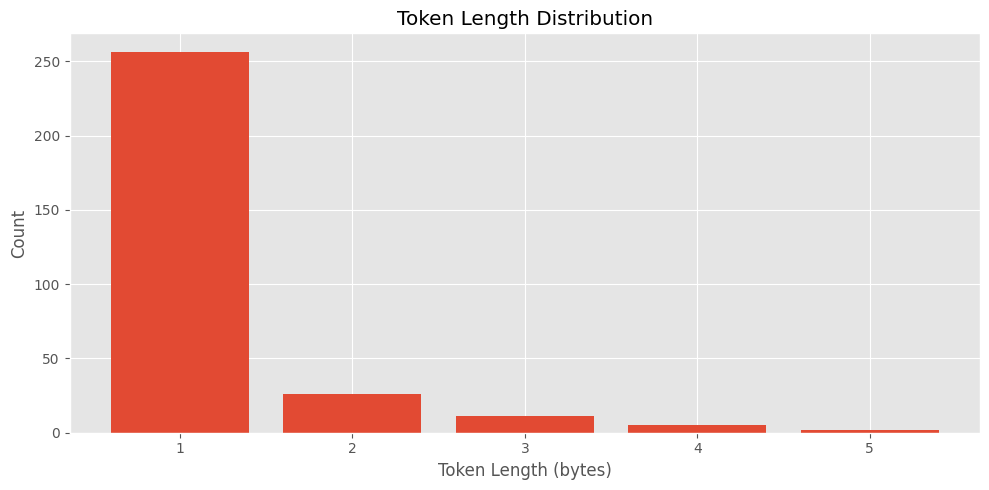

In [8]:
# Test the vocabulary management functions

# Create a sample training text
training_text = """
The Byte Pair Encoding (BPE) algorithm is a data compression technique
that iteratively replaces the most frequent pair of consecutive bytes
in a sequence with a single, unused byte. In NLP, BPE operates on 
characters or subwords rather than bytes, making it effective for 
tokenization tasks in language models.
""" * 3  # Repeat to ensure we have enough repeated patterns

# Create a new tokenizer with a target vocab size for testing
vocab_size = 300
tokenizer = BPETokenizer(vocab_size=vocab_size, debug=False)

# Train the tokenizer
print("Training tokenizer...")
operations = tokenizer.train(training_text, verbose=True)

print("\n--- Vocabulary Statistics ---")
stats = tokenizer.get_vocabulary_stats()
print(f"Vocabulary size: {stats['vocab_size']}")
print(f"Min token length: {stats['min_token_length']}")
print(f"Max token length: {stats['max_token_length']}")
print(f"Average token length: {stats['avg_token_length']:.2f}")
print(f"Single-byte tokens: {stats['single_byte_tokens']}")
print(f"Multi-byte tokens: {stats['multi_byte_tokens']}")

# Print some token examples
print("\n--- Token Examples ---")
print("First few byte tokens (0-255):")
for i in range(97, 107):  # Show a few ASCII characters
    token = tokenizer.id_to_token[i]
    try:
        as_char = token.decode('utf-8')
    except:
        as_char = '?'  # Non-printable character
    print(f"  ID {i}: {list(token)} -> '{as_char}'")

print("\nLearned tokens (256+):")
if tokenizer.next_token_id > 256:
    for i in range(256, min(tokenizer.next_token_id, 266)):  # Show first 10 learned tokens
        token = tokenizer.id_to_token[i]
        try:
            as_text = token.decode('utf-8')
        except:
            as_text = '?'  # Non-decodable token
        print(f"  ID {i}: {list(token)} -> '{as_text}'")
else:
    print("  No learned tokens yet")

# Test saving and loading vocabulary
import tempfile
with tempfile.NamedTemporaryFile(suffix='.json', delete=False) as temp:
    vocab_file = temp.name

print(f"\nSaving vocabulary to temporary file: {vocab_file}")
tokenizer.save_vocabulary(vocab_file)

# Create a new tokenizer and load the vocabulary
print("Loading vocabulary into a new tokenizer instance...")
new_tokenizer = BPETokenizer(debug=False)
new_tokenizer.load_vocabulary(vocab_file)

# Verify the loaded vocabulary matches the original
orig_stats = tokenizer.get_vocabulary_stats()
new_stats = new_tokenizer.get_vocabulary_stats()

print("\n--- Vocabulary Verification ---")
print(f"Original vocabulary size: {orig_stats['vocab_size']}")
print(f"Loaded vocabulary size: {new_stats['vocab_size']}")
print(f"Vocabularies match: {orig_stats['vocab_size'] == new_stats['vocab_size']}")

# Check a few specific tokens to ensure they match
token_ids_to_check = [97, 256, min(265, tokenizer.next_token_id - 1)]  # Check 'a', first learned token, and one more
print("\nVerifying specific tokens:")
for token_id in token_ids_to_check:
    if token_id in tokenizer.id_to_token and token_id in new_tokenizer.id_to_token:
        orig_token = tokenizer.id_to_token[token_id]
        new_token = new_tokenizer.id_to_token[token_id]
        match = orig_token == new_token
        print(f"  Token ID {token_id}: {list(orig_token)} vs {list(new_token)} - Match: {match}")
    else:
        print(f"  Token ID {token_id} not found in one of the tokenizers")

# Visualize token length distribution
plt.figure(figsize=(10, 5))
lengths = stats['tokens_by_length']
plt.bar(lengths.keys(), lengths.values())
plt.xlabel('Token Length (bytes)')
plt.ylabel('Count')
plt.title('Token Length Distribution')
plt.tight_layout()
plt.show()

In [9]:
# --- Encode and Decode Functions ---

def encode(self, text):
    """
    Encode text to token IDs.
    
    Args:
        text: The text to encode
        
    Returns:
        List of token IDs
    """
    if not text:
        return []
        
    # Convert text to bytes and then to a list of byte tokens
    byte_values = self.text_to_bytes(text)
    tokens = [bytes([b]) for b in byte_values]
    
    # Apply merges iteratively
    while len(tokens) > 1:
        # Find valid merge pairs in the current token list
        pairs = Counter()
        for i in range(len(tokens) - 1):
            pair = (tokens[i], tokens[i + 1])
            if pair in self.merges:
                pairs[pair] += 1
                
        # If no valid merges, we're done
        if not pairs:
            break
            
        # Apply the highest-priority merge
        pair = pairs.most_common(1)[0][0]
        tokens = self.merge_pair(tokens, pair)
    
    # Convert tokens to token IDs
    token_ids = [self.token_to_id[token] for token in tokens]
    
    if self.debug:
        logger.info(f"Encoded '{text}' to {len(token_ids)} tokens: {token_ids}")
        
    return token_ids

def decode(self, token_ids):
    """
    Decode token IDs back to text.
    
    Args:
        token_ids: List of token IDs
        
    Returns:
        Decoded text
    """
    if not token_ids:
        return ""
        
    # Convert token IDs to token byte sequences
    try:
        tokens = [self.id_to_token[token_id] for token_id in token_ids]
    except KeyError as e:
        raise ValueError(f"Unknown token ID: {e}")
        
    # Flatten the bytes
    byte_values = []
    for token in tokens:
        byte_values.extend(token)
        
    # Convert bytes back to text
    text = self.bytes_to_text(byte_values)
    
    if self.debug:
        logger.info(f"Decoded {len(token_ids)} tokens to: '{text}'")
        
    return text

def encode_with_details(self, text):
    """
    Encode text to token IDs with detailed information about the process.
    
    Args:
        text: The text to encode
        
    Returns:
        Dictionary with token IDs, tokens, and text segments
    """
    if not text:
        return {'token_ids': [], 'tokens': [], 'segments': []}
        
    # Follow the same process as encode
    byte_values = self.text_to_bytes(text)
    tokens = [bytes([b]) for b in byte_values]
    
    # Apply merges iteratively
    while len(tokens) > 1:
        pairs = Counter()
        for i in range(len(tokens) - 1):
            pair = (tokens[i], tokens[i + 1])
            if pair in self.merges:
                pairs[pair] += 1
                
        if not pairs:
            break
            
        pair = pairs.most_common(1)[0][0]
        tokens = self.merge_pair(tokens, pair)
    
    # Get token IDs
    token_ids = [self.token_to_id[token] for token in tokens]
    
    # Create human-readable segments
    segments = []
    for token in tokens:
        try:
            segment = token.decode('utf-8')
        except UnicodeDecodeError:
            # For tokens that can't be decoded as UTF-8
            segment = f"<{' '.join(f'{b:02x}' for b in token)}>"
        segments.append(segment)
    
    return {
        'token_ids': token_ids,
        'tokens': [list(token) for token in tokens],
        'segments': segments
    }

# Add these methods to the BPETokenizer class
BPETokenizer.encode = encode
BPETokenizer.decode = decode
BPETokenizer.encode_with_details = encode_with_details

In [10]:
# Test encode and decode functions

# Create a sample training text and train a tokenizer
training_text = """
Byte Pair Encoding (BPE) is a simple data compression technique
that iteratively replaces the most frequent pair of bytes in a sequence
with a single, unused byte. In NLP, BPE is used for subword tokenization.
"""

# Create a new tokenizer with a small vocab size for testing
vocab_size = 320  # Just enough to learn some interesting tokens
tokenizer = BPETokenizer(vocab_size=vocab_size, debug=False)

# Train the tokenizer
print("Training tokenizer...")
tokenizer.train(training_text, verbose=True)

# Define test cases for encoding/decoding
test_cases = [
    "This is a test.",
    "Byte Pair Encoding works!",
    "BPE can handle repeated patterns efficiently.",
    "",  # Empty string
    "😊",  # Emoji
    "こんにちは",  # Non-Latin script
]

# Test encoding and decoding for each case
print("\n--- Encoding and Decoding Tests ---")
for i, text in enumerate(test_cases):
    print(f"\nTest Case {i+1}: '{text}'")
    
    # Encode
    token_ids = tokenizer.encode(text)
    print(f"  Encoded to {len(token_ids)} tokens: {token_ids}")
    
    # Decode
    decoded = tokenizer.decode(token_ids)
    print(f"  Decoded: '{decoded}'")
    
    # Verify roundtrip
    if text == decoded:
        print("  ✅ Roundtrip successful")
    else:
        print(f"  ❌ Roundtrip failed: '{text}' -> '{decoded}'")

# Use encode_with_details to visualize tokenization
print("\n--- Detailed Encoding Example ---")
example_text = "Byte Pair Encoding is a compression technique."
details = tokenizer.encode_with_details(example_text)

print(f"Text: '{example_text}'")
print(f"Encoded to {len(details['token_ids'])} tokens:")
print(f"  Token IDs: {details['token_ids']}")

# Print the segmentation
segments = details['segments']
print("\nText segmentation:")
segmented_text = ""
for segment in segments:
    segmented_text += f"[{segment}]"
print(segmented_text)

# Visualization of tokens and their IDs
print("\nToken details:")
for i, (token_id, token, segment) in enumerate(zip(details['token_ids'], details['tokens'], segments)):
    token_bytes = bytes(token)
    try:
        repr_str = token_bytes.decode('utf-8')
    except UnicodeDecodeError:
        repr_str = f"<bytes: {' '.join(f'{b:02x}' for b in token_bytes)}>"
    
    print(f"  {i+1}. ID={token_id}, Token={token}, Text='{segment}', Repr='{repr_str}'")

# Test with out-of-vocabulary text
print("\n--- Out-of-Vocabulary Test ---")
oov_text = "zyxwvutsrqponmlkjihgfedcba"  # Reversed alphabet, likely has unusual patterns
oov_token_ids = tokenizer.encode(oov_text)
oov_decoded = tokenizer.decode(oov_token_ids)

print(f"OOV text: '{oov_text}'")
print(f"Encoded to {len(oov_token_ids)} tokens")
print(f"Decoded: '{oov_decoded}'")
print(f"Roundtrip successful: {oov_text == oov_decoded}")

# Time the encoding and decoding
print("\n--- Performance Test ---")
long_text = training_text * 10  # Create a longer text for timing

start_time = time.time()
token_ids = tokenizer.encode(long_text)
encode_time = time.time() - start_time

start_time = time.time()
decoded = tokenizer.decode(token_ids)
decode_time = time.time() - start_time

print(f"Text length: {len(long_text)} characters")
print(f"Encoded to {len(token_ids)} tokens")
print(f"Encoding time: {encode_time:.5f} seconds")
print(f"Decoding time: {decode_time:.5f} seconds")
print(f"Characters per second (encode): {len(long_text) / encode_time:.1f}")
print(f"Characters per second (decode): {len(long_text) / decode_time:.1f}")
print(f"Compression ratio: {len(long_text) / len(token_ids):.2f} chars/token")

Training tokenizer...
Initial tokens: 211
Starting vocabulary size: 256
Training complete. Final vocabulary size: 320
Performed 64 merge operations

--- Encoding and Decoding Tests ---

Test Case 1: 'This is a test.'
  Encoded to 11 tokens: [84, 104, 105, 262, 105, 262, 258, 256, 115, 116, 46]
  Decoded: 'This is a test.'
  ✅ Roundtrip successful

Test Case 2: 'Byte Pair Encoding works!'
  Encoded to 17 tokens: [66, 260, 32, 80, 271, 69, 272, 111, 100, 274, 32, 119, 111, 114, 107, 115, 33]
  Decoded: 'Byte Pair Encoding works!'
  ✅ Roundtrip successful

Test Case 3: 'BPE can handle repeated patterns efficiently.'
  Encoded to 35 tokens: [276, 32, 99, 97, 265, 104, 97, 110, 100, 279, 32, 264, 112, 101, 259, 101, 269, 112, 259, 256, 114, 110, 262, 101, 102, 102, 105, 99, 105, 101, 110, 116, 108, 121, 46]
  Decoded: 'BPE can handle repeated patterns efficiently.'
  ✅ Roundtrip successful

Test Case 4: ''
  Encoded to 0 tokens: []
  Decoded: ''
  ✅ Roundtrip successful

Test Case 5: '😊'
  

In [11]:
# --- Educational Visualizations ---

def visualize_token_merging(self, text, max_tokens=None, steps_to_show=5):
    """
    Visualize the token merging process during training.
    
    Args:
        text: Training text
        max_tokens: Maximum vocabulary size
        steps_to_show: Number of merge steps to visualize
    """
    if max_tokens is None:
        max_tokens = self.vocab_size
        
    # Start with byte-level tokens
    byte_values = self.text_to_bytes(text)
    tokens = [bytes([b]) for b in byte_values]
    
    # Base vocabulary size
    base_vocab_size = len(self.token_to_id)
    
    # Create a figure
    plt.figure(figsize=(12, 8))
    
    # Plot initial state
    step = 0
    token_count = len(tokens)
    vocab_size = base_vocab_size
    steps = [step]
    token_counts = [token_count]
    vocab_sizes = [vocab_size]
    
    # For text visualization
    token_examples = []
    token_examples.append({
        'step': step,
        'tokens': tokens[:50],  # First 50 tokens for display
        'vocab_size': vocab_size
    })
    
    # Perform steps
    for step in range(1, steps_to_show + 1):
        # Break if we've reached the target vocabulary size
        if vocab_size >= max_tokens:
            break
            
        # Perform a training step
        tokens, merged = self.train_step(tokens)
        
        # If no merge was performed, we're done
        if not merged:
            break
            
        # Record state
        token_count = len(tokens)
        vocab_size = len(self.token_to_id)
        steps.append(step)
        token_counts.append(token_count)
        vocab_sizes.append(vocab_size)
        
        # Record token example
        token_examples.append({
            'step': step,
            'tokens': tokens[:50],  # First 50 tokens for display
            'vocab_size': vocab_size
        })
    
    # Plot token counts over training steps
    plt.subplot(2, 1, 1)
    plt.plot(steps, token_counts, 'o-', linewidth=2, markersize=8)
    plt.xlabel('Training Step')
    plt.ylabel('Number of Tokens')
    plt.title('Token Count Reduction During Training')
    plt.grid(True)
    
    # Plot vocabulary size over training steps
    plt.subplot(2, 1, 2)
    plt.plot(steps, vocab_sizes, 'o-', linewidth=2, markersize=8, color='orange')
    plt.xlabel('Training Step')
    plt.ylabel('Vocabulary Size')
    plt.title('Vocabulary Growth During Training')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Display token examples
    print("Token Visualization:")
    for example in token_examples:
        print(f"\nStep {example['step']} (Vocab Size: {example['vocab_size']}):")
        segmented = []
        for token in example['tokens']:
            try:
                seg = token.decode('utf-8')
            except UnicodeDecodeError:
                seg = f"<{' '.join(f'{b:02x}' for b in token)}>"
            segmented.append(seg)
        print(''.join(f"[{s}]" for s in segmented))

def visualize_token_efficiency(self, texts):
    """
    Visualize tokenization efficiency on different texts.
    
    Args:
        texts: Dictionary mapping text names to text content
    """
    results = {}
    
    # Process each text
    for name, text in texts.items():
        # Count characters
        char_count = len(text)
        
        # Encode text
        token_ids = self.encode(text)
        token_count = len(token_ids)
        
        # Calculate ratio
        char_per_token = char_count / token_count if token_count > 0 else 0
        
        # Store results
        results[name] = {
            'char_count': char_count,
            'token_count': token_count,
            'char_per_token': char_per_token
        }
    
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Sort by efficiency
    names = list(results.keys())
    names.sort(key=lambda x: results[x]['char_per_token'])
    
    # Plot character per token ratio
    ratios = [results[name]['char_per_token'] for name in names]
    plt.bar(names, ratios, alpha=0.7, color='skyblue')
    
    plt.xlabel('Text Sample')
    plt.ylabel('Characters per Token')
    plt.title('Tokenization Efficiency (Higher is Better)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("Tokenization Efficiency Results:")
    print(f"{'Text Sample':<20} | {'Chars':<8} | {'Tokens':<8} | {'Chars/Token':<12}")
    print("-" * 55)
    for name in names:
        r = results[name]
        print(f"{name:<20} | {r['char_count']:<8} | {r['token_count']:<8} | {r['char_per_token']:.2f}")

# Add visualization methods to the BPETokenizer class
BPETokenizer.visualize_token_merging = visualize_token_merging
BPETokenizer.visualize_token_efficiency = visualize_token_efficiency

Visualizing token merging process...


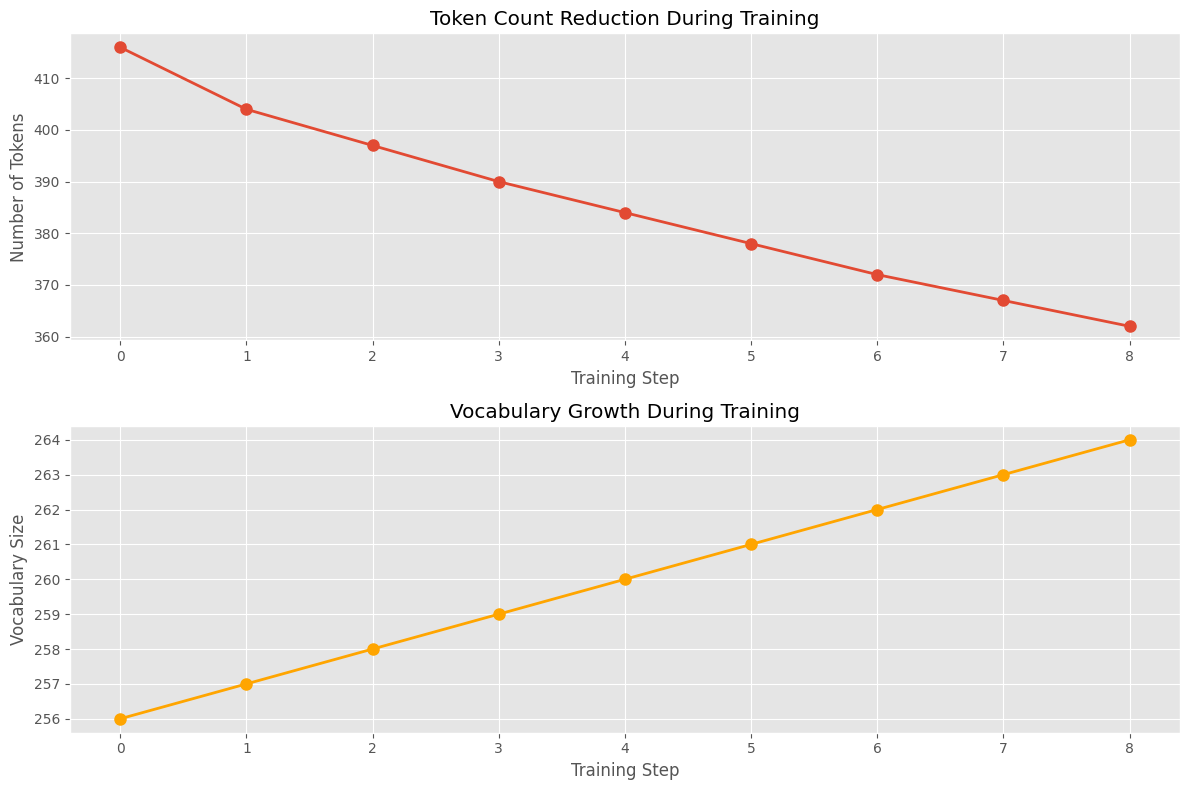

Token Visualization:

Step 0 (Vocab Size: 256):
[
][B][y][t][e][ ][P][a][i][r][ ][E][n][c][o][d][i][n][g][ ][(][B][P][E][)][ ][i][s][ ][a][ ][s][i][m][p][l][e][ ][d][a][t][a][ ][c][o][m][p][r][e][s]

Step 1 (Vocab Size: 257):
[
][B][y][t][e ][P][a][i][r][ ][E][n][c][o][d][i][n][g][ ][(][B][P][E][)][ ][i][s][ ][a][ ][s][i][m][p][l][e ][d][a][t][a][ ][c][o][m][p][r][e][s][s][i]

Step 2 (Vocab Size: 258):
[
][B][y][t][e ][P][a][i][r][ ][E][n][c][o][d][i][n][g][ ][(][B][P][E][)][ ][i][s][ ][a][ ][s][i][m][p][l][e ][d][a][t][a][ ][c][o][m][p][r][e][s][s][i]

Step 3 (Vocab Size: 259):
[
][B][y][t][e ][P][a][i][r][ ][E][n][c][o][d][i][n][g][ ][(][B][P][E][)][ ][i][s][ ][a][ ][s][i][m][p][l][e ][d][a][t][a][ ][c][o][m][p][r][e][s][s][i]

Step 4 (Vocab Size: 260):
[
][B][y][t][e ][P][a][i][r][ ][E][n][c][o][d][i][n][g][ ][(][B][P][E][)][ ][i][s ][a][ ][s][i][m][p][l][e ][d][a][t][a][ ][c][o][m][p][r][e][s][s][i][o]

Step 5 (Vocab Size: 261):
[
][B][y][t][e ][P][a][i][r][ ][E][n][c][o][d][i][n][

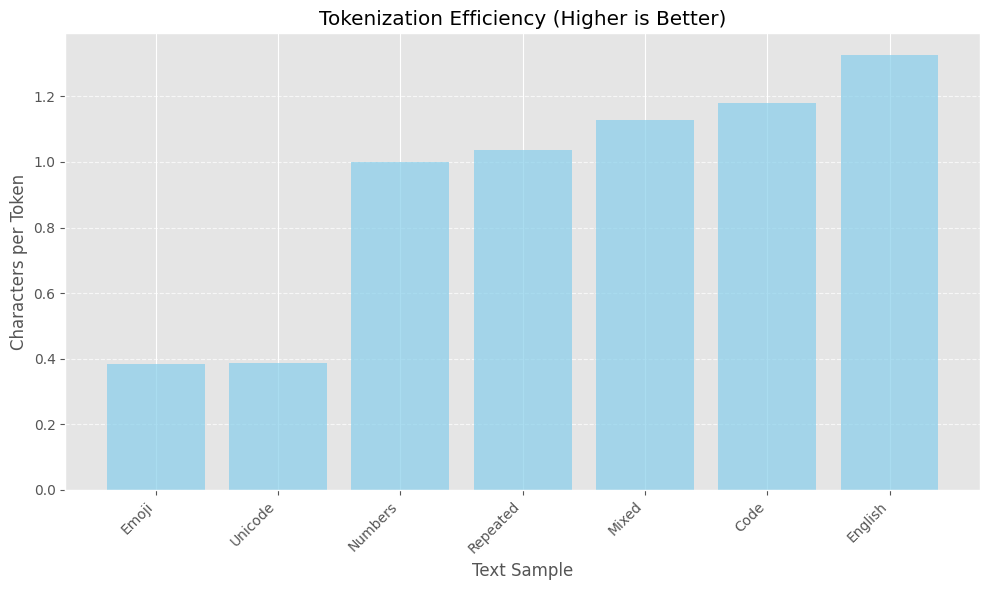

Tokenization Efficiency Results:
Text Sample          | Chars    | Tokens   | Chars/Token 
-------------------------------------------------------
Emoji                | 15       | 39       | 0.38
Unicode              | 29       | 75       | 0.39
Numbers              | 23       | 23       | 1.00
Repeated             | 29       | 28       | 1.04
Mixed                | 44       | 39       | 1.13
Code                 | 79       | 67       | 1.18
English              | 61       | 46       | 1.33

Comparing with untrained tokenizer...


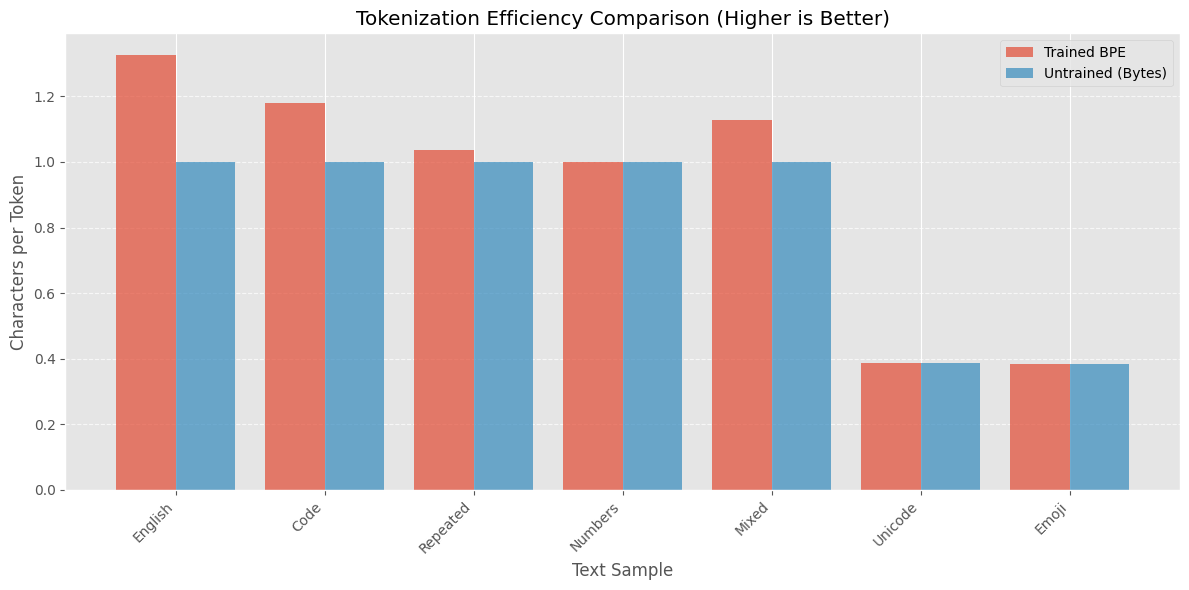


Tokenization Efficiency Comparison:
Text Sample          | Trained BPE (chars/token) | Untrained (Bytes) (chars/token) | 
---------------------------------------------------------------------------
English              | 1.33 (46 tokens) | 1.00 (61 tokens) | 
Code                 | 1.18 (67 tokens) | 1.00 (79 tokens) | 
Repeated             | 1.04 (28 tokens) | 1.00 (29 tokens) | 
Numbers              | 1.00 (23 tokens) | 1.00 (23 tokens) | 
Mixed                | 1.13 (39 tokens) | 1.00 (44 tokens) | 
Unicode              | 0.39 (75 tokens) | 0.39 (75 tokens) | 
Emoji                | 0.38 (39 tokens) | 0.38 (39 tokens) | 


In [12]:
# Test the visualization functions

# Create a sample text
sample_text = """
Byte Pair Encoding (BPE) is a simple data compression technique.
It was first described by Philip Gage in 1994.
The algorithm is very simple:
1. Initialize the vocabulary with individual characters
2. Count the frequency of adjacent pairs of symbols
3. Replace the most frequent pair with a new symbol
4. Repeat until the desired vocabulary size is reached

BPE is widely used in Natural Language Processing (NLP).
"""

# Create a fresh tokenizer
tokenizer = BPETokenizer(vocab_size=500, debug=False)

# Visualize token merging
print("Visualizing token merging process...")
tokenizer.visualize_token_merging(sample_text, steps_to_show=8)

# Train the tokenizer fully
tokenizer.train(sample_text, verbose=True)

# Visualize efficiency on different text types
test_texts = {
    "English": "This is a sample English text with common words and patterns.",
    "Code": "def factorial(n):\n    if n <= 1:\n        return 1\n    return n * factorial(n-1)",
    "Repeated": "aaaaa bbbbb ccccc ddddd eeeee",
    "Numbers": "12345 67890 12345 67890",
    "Mixed": "Text with code: x = 42; and numbers: 3.14159",
    "Unicode": "こんにちは世界! 你好世界! नमस्ते दुनिया!",
    "Emoji": "😊 🚀 🌍 🔥 💯 👍 🎉 🎯",
}

print("\nVisualizing tokenization efficiency...")
tokenizer.visualize_token_efficiency(test_texts)

# Compare with an untrained tokenizer
print("\nComparing with untrained tokenizer...")
untrained = BPETokenizer(vocab_size=500, debug=False)

# Modified function to compare multiple tokenizers
def compare_tokenizers(tokenizers, texts):
    """Compare tokenization efficiency across multiple tokenizers."""
    results = {}
    
    for name, tokenizer in tokenizers.items():
        tokenizer_results = {}
        
        for text_name, text in texts.items():
            # Count characters
            char_count = len(text)
            
            # Encode text
            token_ids = tokenizer.encode(text)
            token_count = len(token_ids)
            
            # Calculate ratio
            char_per_token = char_count / token_count if token_count > 0 else 0
            
            # Store results
            tokenizer_results[text_name] = {
                'char_count': char_count,
                'token_count': token_count,
                'char_per_token': char_per_token
            }
            
        results[name] = tokenizer_results
        
    # Create a comparison figure
    plt.figure(figsize=(12, 6))
    
    # Get all text names
    text_names = list(texts.keys())
    tokenizer_names = list(tokenizers.keys())
    
    # Number of groups
    n_groups = len(text_names)
    
    # Width of a bar
    bar_width = 0.8 / len(tokenizers)
    
    # Positions for the bars
    indices = np.arange(n_groups)
    
    # Plot bars for each tokenizer
    for i, tokenizer_name in enumerate(tokenizer_names):
        # Get ratios for this tokenizer
        ratios = [results[tokenizer_name][text_name]['char_per_token'] for text_name in text_names]
        
        # Plot bars at the right position
        plt.bar(indices + i * bar_width, ratios, bar_width, 
                alpha=0.7, label=tokenizer_name)
        
    plt.xlabel('Text Sample')
    plt.ylabel('Characters per Token')
    plt.title('Tokenization Efficiency Comparison (Higher is Better)')
    plt.xticks(indices + bar_width * (len(tokenizers) - 1) / 2, text_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print comparison table
    print("\nTokenization Efficiency Comparison:")
    print(f"{'Text Sample':<20} | ", end="")
    for tokenizer_name in tokenizer_names:
        print(f"{tokenizer_name+' (chars/token)':<25} | ", end="")
    print()
    print("-" * (25 * (len(tokenizer_names) + 1)))
    
    for text_name in text_names:
        print(f"{text_name:<20} | ", end="")
        for tokenizer_name in tokenizer_names:
            ratio = results[tokenizer_name][text_name]['char_per_token']
            print(f"{ratio:.2f} ({results[tokenizer_name][text_name]['token_count']} tokens) | ", end="")
        print()

# Compare the tokenizers
tokenizers = {
    "Trained BPE": tokenizer,
    "Untrained (Bytes)": untrained
}

compare_tokenizers(tokenizers, test_texts)

In [13]:
# Complete Implementation - All In One

class CompleteBPETokenizer:
    """
    A complete, monolithic implementation of the Byte Pair Encoding (BPE) tokenizer.
    
    This implementation includes:
    1. Byte-level tokenization
    2. Pair frequency counting
    3. Merge operations
    4. Vocabulary management
    5. Encoding and decoding
    6. Visualization tools
    """
    
    def __init__(self, vocab_size=256, debug=False):
        """
        Initialize the BPE tokenizer.
        
        Args:
            vocab_size: Target vocabulary size (minimum 256 for bytes)
            debug: Whether to print debug information
        """
        self.debug = debug
        self.vocab_size = max(256, vocab_size)  # We need at least 256 tokens for bytes
        
        # Start with the basic byte vocabulary (0-255)
        # Maps token IDs to their byte sequences
        self.id_to_token = {i: bytes([i]) for i in range(256)}
        
        # Maps byte sequences to their token IDs
        self.token_to_id = {bytes([i]): i for i in range(256)}
        
        # Stores merges as (token1, token2) -> new_token
        self.merges = {}
        
        # Tracks the next available token ID
        self.next_token_id = 256
        
        if self.debug:
            print(f"Initialized BPETokenizer with target vocab size {self.vocab_size}")
    
    # === Byte-Level Tokenization ===
    
    def text_to_bytes(self, text):
        """Convert text to a list of byte values."""
        if not isinstance(text, str):
            raise TypeError("Input must be a string")
            
        # Convert to bytes using UTF-8 encoding
        byte_array = list(text.encode('utf-8'))
        
        if self.debug:
            print(f"Converted text to bytes: '{text}' -> {byte_array}")
        
        return byte_array
    
    def bytes_to_text(self, byte_list):
        """Convert a list of byte values back to text."""
        if not isinstance(byte_list, list):
            raise TypeError("Input must be a list of integers")
        
        if not all(isinstance(b, int) and 0 <= b <= 255 for b in byte_list):
            raise ValueError("All bytes must be integers in range 0-255")
            
        # Convert byte list to bytearray and then to string
        try:
            # Convert to bytearray first
            byte_array = bytearray(byte_list)
            
            # Then decode to string using UTF-8
            text = byte_array.decode('utf-8')
            
            if self.debug:
                print(f"Converted bytes to text: {byte_list} -> '{text}'")
                
            return text
        except UnicodeDecodeError as e:
            # Handle invalid UTF-8 sequences
            print(f"Failed to decode bytes: {e}")
            raise ValueError(f"Invalid UTF-8 byte sequence: {e}")
    
    # === Pair Frequency Counter ===
    
    def count_token_pairs(self, tokens):
        """
        Count occurrences of adjacent token pairs in a sequence.
        
        Args:
            tokens: List of token byte sequences
            
        Returns:
            Counter of token pairs with their frequencies
        """
        if not tokens:
            return Counter()
            
        # Count pairs of adjacent tokens
        pairs = Counter()
        for i in range(len(tokens) - 1):
            pair = (tokens[i], tokens[i + 1])
            pairs[pair] += 1
            
        if self.debug:
            print(f"Found {len(pairs)} unique token pairs")
            if len(pairs) < 10:  # Only log details for small inputs
                print(f"Pair counts: {pairs}")
                
        return pairs

    def get_most_frequent_pair(self, pairs):
        """
        Find the most frequent token pair.
        
        Args:
            pairs: Counter of token pairs with their frequencies
            
        Returns:
            Tuple of (token1, token2) representing the most frequent pair
        """
        if not pairs:
            return None
            
        # Find the pair with the highest count
        most_common_pair = pairs.most_common(1)[0][0]
        
        if self.debug:
            count = pairs[most_common_pair]
            t1, t2 = most_common_pair
            print(f"Most frequent pair: ({t1}, {t2}) with count {count}")
            
        return most_common_pair
    
    # === Merge Operations ===
    
    def merge_pair(self, tokens, pair):
        """
        Replace all occurrences of a token pair with a new merged token.
        
        Args:
            tokens: List of token byte sequences
            pair: Tuple of (token1, token2) to merge
            
        Returns:
            Updated list of tokens after merging
        """
        if not tokens or pair is None:
            return tokens
            
        t1, t2 = pair
        result = []
        i = 0
        
        # Create a new merged token by concatenating the pair
        merged_token = t1 + t2
        
        # Update vocabulary with the new token
        if merged_token not in self.token_to_id:
            self.id_to_token[self.next_token_id] = merged_token
            self.token_to_id[merged_token] = self.next_token_id
            self.next_token_id += 1
            
            # Record this merge in our merges dictionary
            self.merges[pair] = merged_token
            
            if self.debug:
                print(f"Created new token {list(merged_token)} with ID {self.next_token_id - 1}")
        
        # Scan through tokens and perform merges
        while i < len(tokens):
            # If we're at the last token, just add it
            if i == len(tokens) - 1:
                result.append(tokens[i])
                break
                
            # Check if current pair matches the target pair
            if tokens[i] == t1 and tokens[i + 1] == t2:
                # Add the merged token and skip both original tokens
                result.append(merged_token)
                i += 2
            else:
                # Add the current token and move to the next
                result.append(tokens[i])
                i += 1
                
        if self.debug:
            print(f"Merged {pair} -> {list(merged_token)}")
            print(f"Tokens before: {len(tokens)}, after: {len(result)}")
            
        return result

    def train_step(self, tokens):
        """
        Perform a single training step: find most frequent pair and merge it.
        
        Args:
            tokens: List of token byte sequences
            
        Returns:
            (updated tokens, was_merge_performed)
        """
        # Count pairs
        pairs = self.count_token_pairs(tokens)
        
        # If no pairs, no merges to perform
        if not pairs:
            return tokens, False
            
        # Find most frequent pair
        pair = self.get_most_frequent_pair(pairs)
        
        # Merge the most frequent pair
        new_tokens = self.merge_pair(tokens, pair)
        
        # Return the new tokens and whether a merge was performed
        return new_tokens, len(new_tokens) < len(tokens)
    
    # === Vocabulary Management ===
    
    def train(self, text, max_tokens=None, verbose=False):
        """
        Train the tokenizer on a text corpus.
        
        Args:
            text: The training text
            max_tokens: Maximum vocabulary size (if None, uses self.vocab_size)
            verbose: Whether to print progress information
            
        Returns:
            Number of merge operations performed
        """
        if max_tokens is None:
            max_tokens = self.vocab_size
            
        # Start with byte-level tokens
        byte_values = self.text_to_bytes(text)
        tokens = [bytes([b]) for b in byte_values]
        
        if verbose:
            print(f"Initial tokens: {len(tokens)}")
            print(f"Starting vocabulary size: {len(self.token_to_id)}")
            
        # Keep track of operations
        operations = 0
        
        # Perform merges until we reach the target vocabulary size or can't merge anymore
        while len(self.token_to_id) < max_tokens:
            # Perform a training step
            tokens, merged = self.train_step(tokens)
            
            # If no merge was performed, we're done
            if not merged:
                if verbose:
                    print("No more merges possible.")
                break
                
            operations += 1
            
            if verbose and operations % 100 == 0:
                print(f"Completed {operations} merges. Vocab size: {len(self.token_to_id)}")
                
        if verbose:
            print(f"Training complete. Final vocabulary size: {len(self.token_to_id)}")
            print(f"Performed {operations} merge operations")
            
        return operations

    def save_vocabulary(self, file_path):
        """
        Save the vocabulary to a file.
        
        Args:
            file_path: Path to save the vocabulary
        """
        # Store token pairs as strings with a separator that won't appear in the data
        merges_dict = {}
        for (t1, t2), v in self.merges.items():
            key = f"{list(t1)}|{list(t2)}"  # Use | as separator instead of comma
            merges_dict[key] = list(v)
        
        vocabulary = {
            'id_to_token': {k: list(v) for k, v in self.id_to_token.items()},
            'merges': merges_dict,
            'vocab_size': self.vocab_size,
            'next_token_id': self.next_token_id
        }
        
        with open(file_path, 'w') as f:
            json.dump(vocabulary, f, indent=2)
            
        if self.debug:
            print(f"Saved vocabulary to {file_path}")
            
    def load_vocabulary(self, file_path):
        """
        Load the vocabulary from a file.
        
        Args:
            file_path: Path to load the vocabulary from
        """
        with open(file_path, 'r') as f:
            vocabulary = json.load(f)
            
        # Reset the current vocabulary
        self.id_to_token = {int(k): bytes(v) for k, v in vocabulary['id_to_token'].items()}
        self.token_to_id = {bytes(v): int(k) for k, v in vocabulary['id_to_token'].items()}
        
        # Parse the merges
        self.merges = {}
        for merge_str, merged in vocabulary['merges'].items():
            parts = merge_str.split('|')  # Split by the | separator
            if len(parts) == 2:
                t1_str, t2_str = parts
                try:
                    t1 = bytes(eval(t1_str))
                    t2 = bytes(eval(t2_str))
                    self.merges[(t1, t2)] = bytes(merged)
                except Exception as e:
                    print(f"Error parsing merge: {merge_str} - {e}")
        
        # Load other attributes
        self.vocab_size = vocabulary['vocab_size']
        self.next_token_id = vocabulary['next_token_id']
        
        if self.debug:
            print(f"Loaded vocabulary from {file_path}")
            print(f"Vocabulary size: {len(self.token_to_id)}")
    
    # === Encode and Decode Functions ===
    
    def encode(self, text):
        """
        Encode text to token IDs.
        
        Args:
            text: The text to encode
            
        Returns:
            List of token IDs
        """
        if not text:
            return []
            
        # Convert text to bytes and then to a list of byte tokens
        byte_values = self.text_to_bytes(text)
        tokens = [bytes([b]) for b in byte_values]
        
        # Apply merges iteratively
        while len(tokens) > 1:
            # Find valid merge pairs in the current token list
            pairs = Counter()
            for i in range(len(tokens) - 1):
                pair = (tokens[i], tokens[i + 1])
                if pair in self.merges:
                    pairs[pair] += 1
                    
            # If no valid merges, we're done
            if not pairs:
                break
                
            # Apply the highest-priority merge
            pair = pairs.most_common(1)[0][0]
            tokens = self.merge_pair(tokens, pair)
        
        # Convert tokens to token IDs
        token_ids = [self.token_to_id[token] for token in tokens]
        
        if self.debug:
            print(f"Encoded '{text}' to {len(token_ids)} tokens: {token_ids}")
            
        return token_ids

    def decode(self, token_ids):
        """
        Decode token IDs back to text.
        
        Args:
            token_ids: List of token IDs
            
        Returns:
            Decoded text
        """
        if not token_ids:
            return ""
            
        # Convert token IDs to token byte sequences
        try:
            tokens = [self.id_to_token[token_id] for token_id in token_ids]
        except KeyError as e:
            raise ValueError(f"Unknown token ID: {e}")
            
        # Flatten the bytes
        byte_values = []
        for token in tokens:
            byte_values.extend(token)
            
        # Convert bytes back to text
        text = self.bytes_to_text(byte_values)
        
        if self.debug:
            print(f"Decoded {len(token_ids)} tokens to: '{text}'")
            
        return text
    
    # === Visualization Functions ===
    
    def visualize_token_merging(self, text, max_tokens=None, steps_to_show=5):
        """
        Visualize the token merging process during training.
        
        Args:
            text: Training text
            max_tokens: Maximum vocabulary size
            steps_to_show: Number of merge steps to visualize
        """
        if max_tokens is None:
            max_tokens = self.vocab_size
            
        # Start with byte-level tokens
        byte_values = self.text_to_bytes(text)
        tokens = [bytes([b]) for b in byte_values]
        
        # Base vocabulary size
        base_vocab_size = len(self.token_to_id)
        
        # Create a figure
        plt.figure(figsize=(12, 8))
        
        # Plot initial state
        step = 0
        token_count = len(tokens)
        vocab_size = base_vocab_size
        steps = [step]
        token_counts = [token_count]
        vocab_sizes = [vocab_size]
        
        # For text visualization
        token_examples = []
        token_examples.append({
            'step': step,
            'tokens': tokens[:50],  # First 50 tokens for display
            'vocab_size': vocab_size
        })
        
        # Perform steps
        for step in range(1, steps_to_show + 1):
            # Break if we've reached the target vocabulary size
            if vocab_size >= max_tokens:
                break
                
            # Perform a training step
            tokens, merged = self.train_step(tokens)
            
            # If no merge was performed, we're done
            if not merged:
                break
                
            # Record state
            token_count = len(tokens)
            vocab_size = len(self.token_to_id)
            steps.append(step)
            token_counts.append(token_count)
            vocab_sizes.append(vocab_size)
            
            # Record token example
            token_examples.append({
                'step': step,
                'tokens': tokens[:50],  # First 50 tokens for display
                'vocab_size': vocab_size
            })
        
        # Plot token counts over training steps
        plt.subplot(2, 1, 1)
        plt.plot(steps, token_counts, 'o-', linewidth=2, markersize=8)
        plt.xlabel('Training Step')
        plt.ylabel('Number of Tokens')
        plt.title('Token Count Reduction During Training')
        plt.grid(True)
        
        # Plot vocabulary size over training steps
        plt.subplot(2, 1, 2)
        plt.plot(steps, vocab_sizes, 'o-', linewidth=2, markersize=8, color='orange')
        plt.xlabel('Training Step')
        plt.ylabel('Vocabulary Size')
        plt.title('Vocabulary Growth During Training')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Display token examples
        print("Token Visualization:")
        for example in token_examples:
            print(f"\nStep {example['step']} (Vocab Size: {example['vocab_size']}):")
            segmented = []
            for token in example['tokens']:
                try:
                    seg = token.decode('utf-8')
                except UnicodeDecodeError:
                    seg = f"<{' '.join(f'{b:02x}' for b in token)}>"
                segmented.append(seg)
            print(''.join(f"[{s}]" for s in segmented))

Training the tokenizer...
Initial tokens: 380
Starting vocabulary size: 256
Completed 100 merges. Vocab size: 356
Completed 200 merges. Vocab size: 456
Training complete. Final vocabulary size: 500
Performed 244 merge operations

Test sentence: 'BPE tokenization works well for natural language processing tasks.'
Encoded to 47 tokens: [285, 32, 116, 111, 107, 101, 289, 122, 97, 260, 288, 32, 306, 107, 257, 119, 101, 108, 108, 32, 305, 110, 97, 116, 117, 290, 108, 32, 278, 110, 103, 117, 312, 256, 112, 114, 111, 291, 115, 115, 283, 116, 97, 115, 107, 115, 46]
Decoded: 'BPE tokenization works well for natural language processing tasks.'
Roundtrip successful: True

Visualizing the token merging process...


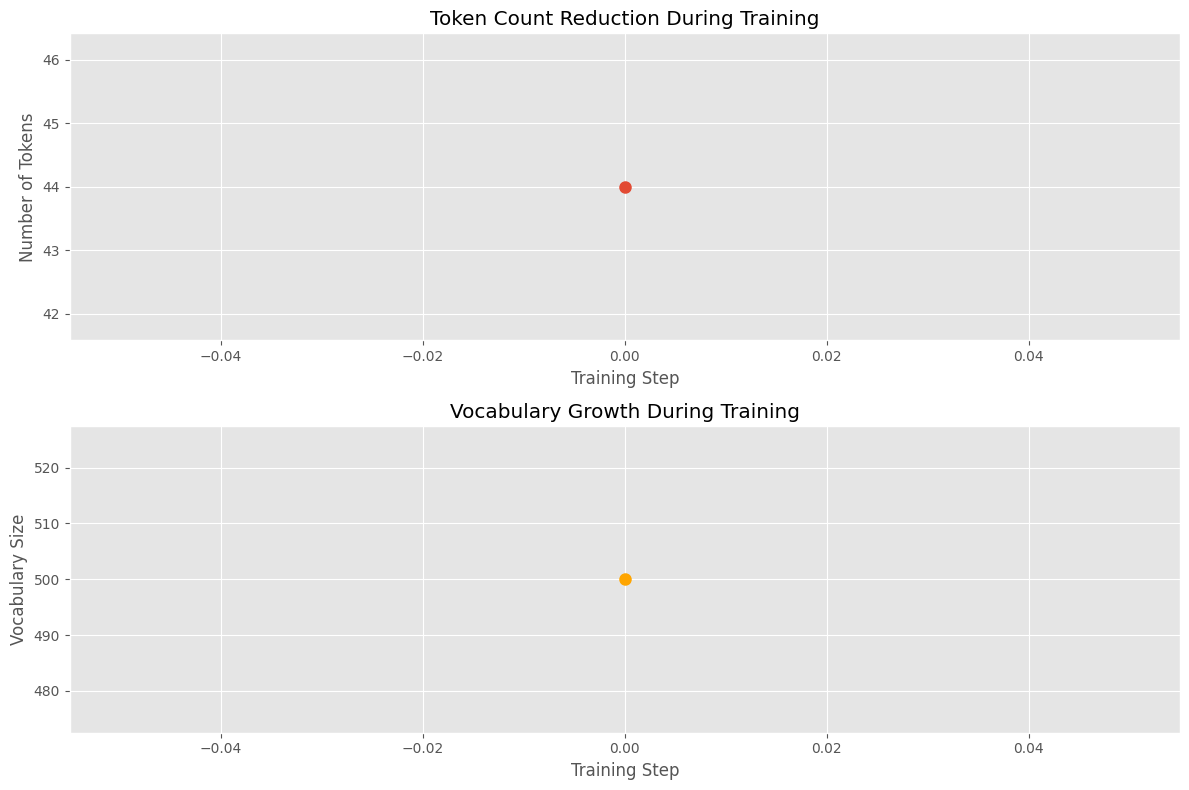

Token Visualization:

Step 0 (Vocab Size: 500):
[T][h][i][s][ ][i][s][ ][a][ ][d][e][m][o][n][s][t][r][a][t][i][o][n][ ][o][f][ ][B][P][E][ ][t][o][k][e][n][i][z][a][t][i][o][n][.]

Monolithic BPE tokenizer implementation complete!


In [14]:
# Test the complete implementation

# Sample text for testing
sample_text = """
Byte Pair Encoding (BPE) is a simple data compression technique.
It iteratively replaces the most frequent pair of consecutive bytes in a sequence
with a single, unused byte. In NLP, BPE is used for subword tokenization.
This approach is particularly effective for handling rare words and
morphologically rich languages. The algorithm was first described by Philip Gage in 1994.
"""

# Create a tokenizer with a reasonable vocabulary size
tokenizer = CompleteBPETokenizer(vocab_size=500, debug=False)

# Train the tokenizer
print("Training the tokenizer...")
tokenizer.train(sample_text, verbose=True)

# Encode and decode a test sentence
test_sentence = "BPE tokenization works well for natural language processing tasks."
print(f"\nTest sentence: '{test_sentence}'")

token_ids = tokenizer.encode(test_sentence)
print(f"Encoded to {len(token_ids)} tokens: {token_ids}")

decoded_text = tokenizer.decode(token_ids)
print(f"Decoded: '{decoded_text}'")
print(f"Roundtrip successful: {test_sentence == decoded_text}")

# Visualize the token merging process (just a few steps)
print("\nVisualizing the token merging process...")
demo_text = "This is a demonstration of BPE tokenization."
tokenizer.visualize_token_merging(demo_text, steps_to_show=5)

# Done!
print("\nMonolithic BPE tokenizer implementation complete!")

## Introduction to BPE <a name="introduction"></a>

Byte Pair Encoding (BPE) is a data compression technique that iteratively replaces the most frequent pair of bytes (or characters) in a sequence with a single, unused byte. In the context of natural language processing, it's used to create a vocabulary of subword tokens.

### Basic Algorithm:

1. Start with a vocabulary of individual characters/bytes
2. Count all pairs of adjacent symbols in the training corpus
3. Replace the most frequent pair with a new symbol
4. Add this new symbol to the vocabulary
5. Repeat steps 2-4 until the desired vocabulary size is reached

### Benefits of BPE:

- Handles out-of-vocabulary words by breaking them into subword units
- Balances vocabulary size and sequence length
- Works for any language without language-specific rules
- Can represent rare words as sequences of subword units

Let's implement each part of the algorithm step by step.

## Byte-Level Tokenization <a name="byte-level-tokenization"></a>

### Requirement #1: Byte-Level Tokenization
- **Description**: Implement base tokenization of text to bytes
- **Success Criteria**: Correctly converts any UTF-8 text to byte sequence and back with 100% fidelity
- **Test Cases**: ASCII, Unicode, emoji texts

First, we'll implement functions to convert between text and bytes. Working at the byte level allows us to handle any UTF-8 text without special cases.

In [15]:
class ByteLevelTokenizer:
    """
    Handles conversion between text and bytes.
    
    This is the foundation of the BPE algorithm, which operates at the byte level.
    Working with bytes allows us to handle any UTF-8 text without special cases.
    """
    
    def __init__(self, debug: bool = False):
        """
        Initialize the byte-level tokenizer.
        
        Args:
            debug: Whether to print debug information
        
        Pre-condition: None
        Post-condition: Tokenizer is initialized with debug setting
        """
        self.debug = debug
        
        # Validate initialization with an assertion
        assert isinstance(self.debug, bool), "Debug flag must be a boolean"
        
        if self.debug:
            logger.info("ByteLevelTokenizer initialized")
    
    def text_to_bytes(self, text: str) -> List[int]:
        """
        Convert text to a list of byte values.
        
        Args:
            text: The input text to convert to bytes
            
        Returns:
            A list of integer values representing UTF-8 encoded bytes
            
        Pre-condition: Input is a valid string
        Post-condition: Output is a list of integers in range 0-255
        
        Example:
            >>> tokenizer = ByteLevelTokenizer(debug=True)
            >>> tokenizer.text_to_bytes("Hello")
            [72, 101, 108, 108, 111]
        """
        # Input validation
        if not isinstance(text, str):
            raise TypeError("Input must be a string")
            
        # Convert to bytes using UTF-8 encoding
        byte_array = list(text.encode('utf-8'))
        
        # Validate output with assertions
        assert all(0 <= b <= 255 for b in byte_array), "Byte values must be in range 0-255"
        
        if self.debug:
            logger.info(f"Converted text to bytes: '{text}' -> {byte_array}")
        
        return byte_array
    
    def bytes_to_text(self, byte_list: List[int]) -> str:
        """
        Convert a list of byte values back to text.
        
        Args:
            byte_list: List of integer values representing UTF-8 encoded bytes
            
        Returns:
            The decoded string
            
        Pre-condition: Input is a list of integers in range 0-255
        Post-condition: Output is a valid UTF-8 string
        
        Example:
            >>> tokenizer = ByteLevelTokenizer(debug=True)
            >>> tokenizer.bytes_to_text([72, 101, 108, 108, 111])
            'Hello'
        """
        # Input validation
        if not isinstance(byte_list, list):
            raise TypeError("Input must be a list of integers")
        
        if not all(isinstance(b, int) and 0 <= b <= 255 for b in byte_list):
            raise ValueError("All bytes must be integers in range 0-255")
            
        # Convert byte list to bytearray and then to string
        try:
            # Convert to bytearray first
            byte_array = bytearray(byte_list)
            
            # Then decode to string using UTF-8
            text = byte_array.decode('utf-8')
            
            if self.debug:
                logger.info(f"Converted bytes to text: {byte_list} -> '{text}'")
                
            return text
        except UnicodeDecodeError as e:
            # Handle invalid UTF-8 sequences
            logger.error(f"Failed to decode bytes: {e}")
            raise ValueError(f"Invalid UTF-8 byte sequence: {e}")

    def visualize_byte_representation(self, text: str) -> None:
        """
        Visualize the byte representation of text for educational purposes.
        
        Args:
            text: The text to visualize
            
        Returns:
            None (prints to console)
            
        Pre-condition: Input is a valid string
        Post-condition: Visualization is printed to console
        """
        if not self.debug:
            return
            
        bytes_list = self.text_to_bytes(text)
        
        print("=" * 50)
        print("BYTE REPRESENTATION VISUALIZATION")
        print("=" * 50)
        print(f"Original text: '{text}'")
        print(f"UTF-8 bytes: {bytes_list}")
        print(f"Hex representation: {' '.join(f'0x{b:02x}' for b in bytes_list)}")
        print(f"Binary representation: {' '.join(f'{b:08b}' for b in bytes_list)}")
        print("=" * 50)

    def verify_roundtrip(self, text: str) -> bool:
        """
        Verify that text can be converted to bytes and back without loss.
        
        Args:
            text: The text to verify
            
        Returns:
            True if the roundtrip conversion is successful, False otherwise
            
        Pre-condition: Input is a valid string
        Post-condition: Returns boolean indicating success
        """
        try:
            bytes_list = self.text_to_bytes(text)
            reconstructed_text = self.bytes_to_text(bytes_list)
            is_successful = text == reconstructed_text
            
            if self.debug:
                if is_successful:
                    logger.info(f"Roundtrip verification successful for: '{text}'")
                else:
                    logger.error(f"Roundtrip verification failed: '{text}' vs '{reconstructed_text}'")
                    
            return is_successful
        except Exception as e:
            logger.error(f"Exception during roundtrip verification: {e}")
            return False

### Testing the Byte-Level Tokenizer

Let's test our implementation with various types of text, including ASCII, Unicode, and emojis.

In [16]:
def test_byte_level_tokenizer():
    """Test the ByteLevelTokenizer with various inputs."""
    tokenizer = ByteLevelTokenizer(debug=True)
    
    # Test case 1: ASCII text
    ascii_text = "Hello, world!"
    bytes_list = tokenizer.text_to_bytes(ascii_text)
    reconstructed_text = tokenizer.bytes_to_text(bytes_list)
    print(f"\nTest Case 1: ASCII Text")
    print(f"Original: '{ascii_text}'")
    print(f"Bytes: {bytes_list}")
    print(f"Reconstructed: '{reconstructed_text}'")
    print(f"Success: {ascii_text == reconstructed_text}")
    tokenizer.visualize_byte_representation(ascii_text)
    
    # Test case 2: Unicode text (non-ASCII characters)
    unicode_text = "Hello, 世界! こんにちは"
    bytes_list = tokenizer.text_to_bytes(unicode_text)
    reconstructed_text = tokenizer.bytes_to_text(bytes_list)
    print(f"\nTest Case 2: Unicode Text")
    print(f"Original: '{unicode_text}'")
    print(f"Bytes: {bytes_list}")
    print(f"Reconstructed: '{reconstructed_text}'")
    print(f"Success: {unicode_text == reconstructed_text}")
    tokenizer.visualize_byte_representation(unicode_text)
    
    # Test case 3: Emoji text
    emoji_text = "Hello! 😊🚀🌍"
    bytes_list = tokenizer.text_to_bytes(emoji_text)
    reconstructed_text = tokenizer.bytes_to_text(bytes_list)
    print(f"\nTest Case 3: Emoji Text")
    print(f"Original: '{emoji_text}'")
    print(f"Bytes: {bytes_list}")
    print(f"Reconstructed: '{reconstructed_text}'")
    print(f"Success: {emoji_text == reconstructed_text}")
    tokenizer.visualize_byte_representation(emoji_text)
    
    # Test case 4: Mixed content with special characters
    mixed_text = "Special chars: \t\n\r\"'\\, and Unicode: ποΈ§, and emoji: 🎯"
    bytes_list = tokenizer.text_to_bytes(mixed_text)
    reconstructed_text = tokenizer.bytes_to_text(bytes_list)
    print(f"\nTest Case 4: Mixed Content")
    print(f"Original: '{mixed_text}'")
    print(f"Bytes: {bytes_list}")
    print(f"Reconstructed: '{reconstructed_text}'")
    print(f"Success: {mixed_text == reconstructed_text}")
    
    # Verify all test cases with assert
    assert tokenizer.verify_roundtrip(ascii_text), "ASCII text roundtrip failed"
    assert tokenizer.verify_roundtrip(unicode_text), "Unicode text roundtrip failed"
    assert tokenizer.verify_roundtrip(emoji_text), "Emoji text roundtrip failed"
    assert tokenizer.verify_roundtrip(mixed_text), "Mixed content roundtrip failed"
    
    print("\nAll test cases passed!")
    
    # Test error cases
    try:
        tokenizer.text_to_bytes(123)  # Type error
        print("Error: Should have raised TypeError for non-string input")
    except TypeError:
        print("Correctly raised TypeError for non-string input")
        
    try:
        tokenizer.bytes_to_text([300])  # Value error (byte > 255)
        print("Error: Should have raised ValueError for invalid byte value")
    except ValueError:
        print("Correctly raised ValueError for invalid byte value")
        
    try:
        # Invalid UTF-8 sequence
        tokenizer.bytes_to_text([0x80])  # 0x80 is not a valid start of a UTF-8 sequence
        print("Error: Should have raised ValueError for invalid UTF-8 sequence")
    except ValueError:
        print("Correctly raised ValueError for invalid UTF-8 sequence")
    
    print("\nAll error cases tested correctly!")

# Run the tests
test_byte_level_tokenizer()

2025-05-06 02:31:20,474 - INFO - ByteLevelTokenizer initialized
2025-05-06 02:31:20,475 - INFO - Converted text to bytes: 'Hello, world!' -> [72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]
2025-05-06 02:31:20,475 - INFO - Converted bytes to text: [72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33] -> 'Hello, world!'
2025-05-06 02:31:20,476 - INFO - Converted text to bytes: 'Hello, world!' -> [72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]
2025-05-06 02:31:20,476 - INFO - Converted text to bytes: 'Hello, 世界! こんにちは' -> [72, 101, 108, 108, 111, 44, 32, 228, 184, 150, 231, 149, 140, 33, 32, 227, 129, 147, 227, 130, 147, 227, 129, 171, 227, 129, 161, 227, 129, 175]
2025-05-06 02:31:20,477 - INFO - Converted bytes to text: [72, 101, 108, 108, 111, 44, 32, 228, 184, 150, 231, 149, 140, 33, 32, 227, 129, 147, 227, 130, 147, 227, 129, 171, 227, 129, 161, 227, 129, 175] -> 'Hello, 世界! こんにちは'
2025-05-06 02:31:20,477 - INFO - Converted text to bytes: 'Hello, 世


Test Case 1: ASCII Text
Original: 'Hello, world!'
Bytes: [72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]
Reconstructed: 'Hello, world!'
Success: True
BYTE REPRESENTATION VISUALIZATION
Original text: 'Hello, world!'
UTF-8 bytes: [72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]
Hex representation: 0x48 0x65 0x6c 0x6c 0x6f 0x2c 0x20 0x77 0x6f 0x72 0x6c 0x64 0x21
Binary representation: 01001000 01100101 01101100 01101100 01101111 00101100 00100000 01110111 01101111 01110010 01101100 01100100 00100001

Test Case 2: Unicode Text
Original: 'Hello, 世界! こんにちは'
Bytes: [72, 101, 108, 108, 111, 44, 32, 228, 184, 150, 231, 149, 140, 33, 32, 227, 129, 147, 227, 130, 147, 227, 129, 171, 227, 129, 161, 227, 129, 175]
Reconstructed: 'Hello, 世界! こんにちは'
Success: True
BYTE REPRESENTATION VISUALIZATION
Original text: 'Hello, 世界! こんにちは'
UTF-8 bytes: [72, 101, 108, 108, 111, 44, 32, 228, 184, 150, 231, 149, 140, 33, 32, 227, 129, 147, 227, 130, 147, 227, 129, 171, 227, 129, 161, 2

### Evaluation of Byte-Level Tokenization

Let's evaluate our implementation against the success criteria defined in PR.md:

In [17]:
def evaluate_byte_level_tokenizer():
    """Evaluate the ByteLevelTokenizer against success criteria."""
    print("EVALUATION: Byte-Level Tokenization")
    print("=" * 50)
    print("Success Criteria: Correctly converts any UTF-8 text to byte sequence and back with 100% fidelity")
    print("=" * 50)
    
    tokenizer = ByteLevelTokenizer(debug=False)
    
    # Define test cases covering different character types
    test_cases = [
        ("ASCII", "Hello, world!"),
        ("Unicode", "Hello, 世界! こんにちは"),
        ("Emoji", "Hello! 😊🚀🌍"),
        ("Mixed", "Special chars: \t\n\r\"'\\, Unicode: ποΈ§, emoji: 🎯"),
        ("Empty", ""),
        ("Long", "A" * 1000 + "你好" * 100 + "😊" * 50)  # Test longer text
    ]
    
    # Test all cases and collect results
    results = []
    for name, text in test_cases:
        try:
            start_time = time.time()
            bytes_list = tokenizer.text_to_bytes(text)
            reconstructed = tokenizer.bytes_to_text(bytes_list)
            end_time = time.time()
            
            # Check if the roundtrip was successful
            success = text == reconstructed
            time_ms = (end_time - start_time) * 1000
            
            results.append({
                "name": name,
                "text_length": len(text),
                "bytes_length": len(bytes_list),
                "success": success,
                "time_ms": time_ms
            })
        except Exception as e:
            results.append({
                "name": name,
                "text_length": len(text),
                "bytes_length": "N/A",
                "success": False,
                "time_ms": "N/A",
                "error": str(e)
            })
    
    # Display results in a table
    print(f"{'Test Case':<12} | {'Length':<8} | {'Bytes':<8} | {'Success':<8} | {'Time (ms)':<10} | {'Error':<20}")
    print("-" * 75)
    
    for result in results:
        error = result.get("error", "None")
        print(f"{result['name']:<12} | {result['text_length']:<8} | {result['bytes_length']:<8} | {result['success']:<8} | {result['time_ms']:<10.2f} | {error:<20}")
    
    # Calculate overall success rate
    success_count = sum(1 for r in results if r["success"])
    success_rate = success_count / len(results) * 100
    
    print("\nSummary:")
    print(f"Total test cases: {len(results)}")
    print(f"Successful cases: {success_count}")
    print(f"Success rate: {success_rate:.2f}%")
    
    # Final evaluation
    if success_rate == 100:
        print("\nEVALUATION RESULT: ✅ PASSED - All test cases were converted with 100% fidelity")
    else:
        print(f"\nEVALUATION RESULT: ❌ FAILED - Only {success_rate:.2f}% of test cases were converted with 100% fidelity")
    
    return success_rate == 100

# Run the evaluation
byte_level_tokenizer_passed = evaluate_byte_level_tokenizer()

EVALUATION: Byte-Level Tokenization
Success Criteria: Correctly converts any UTF-8 text to byte sequence and back with 100% fidelity
Test Case    | Length   | Bytes    | Success  | Time (ms)  | Error               
---------------------------------------------------------------------------
ASCII        | 13       | 13       | 1        | 0.02       | None                
Unicode      | 16       | 30       | 1        | 0.01       | None                
Emoji        | 10       | 19       | 1        | 0.01       | None                
Mixed        | 46       | 53       | 1        | 0.01       | None                
Empty        | 0        | 0        | 1        | 0.00       | None                
Long         | 1250     | 1800     | 1        | 0.34       | None                

Summary:
Total test cases: 6
Successful cases: 6
Success rate: 100.00%

EVALUATION RESULT: ✅ PASSED - All test cases were converted with 100% fidelity


### Visualizing Byte Distributions

To better understand how different types of text are represented at the byte level, let's visualize the distribution of byte values.

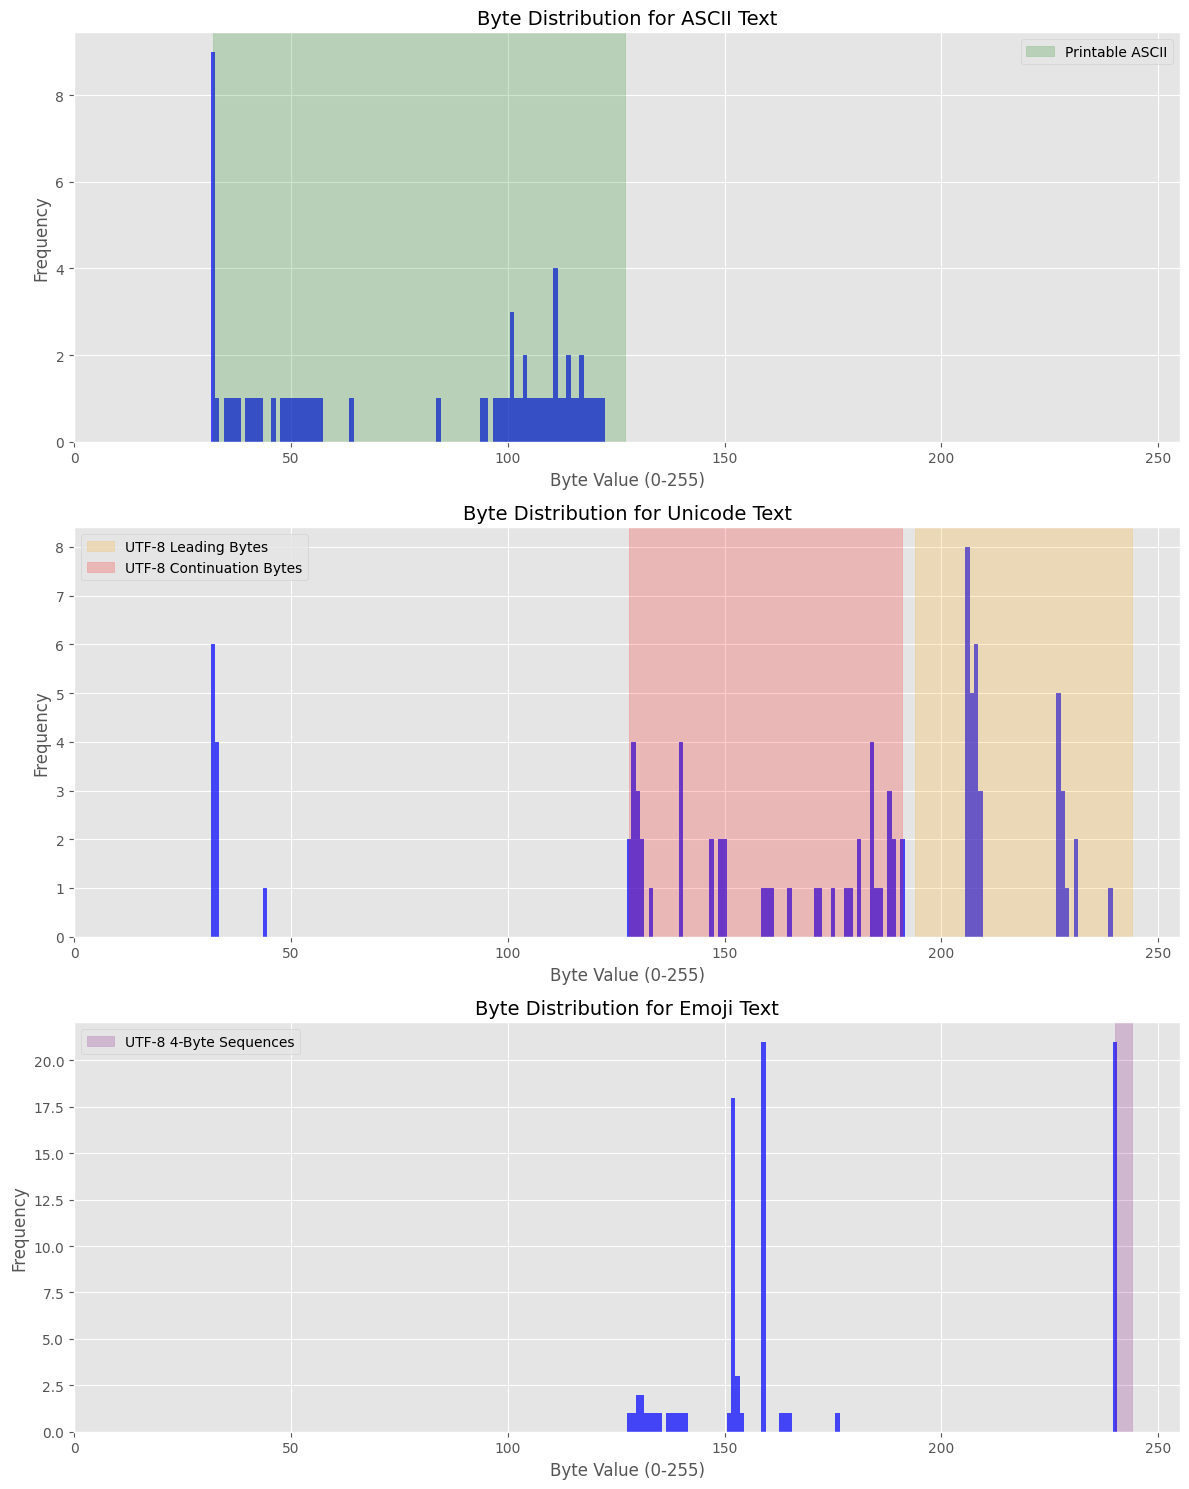

In [18]:
def visualize_byte_distributions():
    """Visualize byte distributions for different types of text."""
    tokenizer = ByteLevelTokenizer(debug=False)
    
    # Sample texts of different types
    text_samples = {
        "ASCII": "The quick brown fox jumps over the lazy dog. 0123456789!@#$%^&*()_+",
        "Unicode": "你好，世界! Привет, мир! γειά σου κόσμος! こんにちは世界!",
        "Emoji": "😀😃😄😁😆😅😂🤣😊😇🙂🙃😉😌😍🥰😘😗😙😚😋"
    }
    
    # Create a figure with subplots
    fig, axes = plt.subplots(len(text_samples), 1, figsize=(12, 5 * len(text_samples)))
    
    for i, (name, text) in enumerate(text_samples.items()):
        # Convert text to bytes
        bytes_list = tokenizer.text_to_bytes(text)
        
        # Count byte occurrences
        byte_counts = Counter(bytes_list)
        
        # Create plot
        ax = axes[i]
        x = list(range(256))  # All possible byte values 0-255
        y = [byte_counts.get(b, 0) for b in x]
        
        ax.bar(x, y, width=1.0, alpha=0.7, color='blue')
        ax.set_title(f"Byte Distribution for {name} Text", fontsize=14)
        ax.set_xlabel("Byte Value (0-255)", fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        ax.set_xlim(0, 255)
        
        # Annotate interesting regions
        if name == "ASCII":
            ax.axvspan(32, 127, alpha=0.2, color='green', label='Printable ASCII')
            ax.legend()
        elif name == "Unicode":
            ax.axvspan(194, 244, alpha=0.2, color='orange', label='UTF-8 Leading Bytes')
            ax.axvspan(128, 191, alpha=0.2, color='red', label='UTF-8 Continuation Bytes')
            ax.legend()
        elif name == "Emoji":
            ax.axvspan(240, 244, alpha=0.2, color='purple', label='UTF-8 4-Byte Sequences')
            ax.legend()
    
    plt.tight_layout()
    plt.show()

# Visualize byte distributions
visualize_byte_distributions()